In [27]:
import matplotlib as mpl
import random
import numpy as np


from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
mplstyle.use('fast')
mplstyle.use('default')
mpl.rcParams['figure.figsize'] = [20, 10]

colors = ["lightgreen","yellow", "red"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

In [28]:
game_length = 14
runs = 1


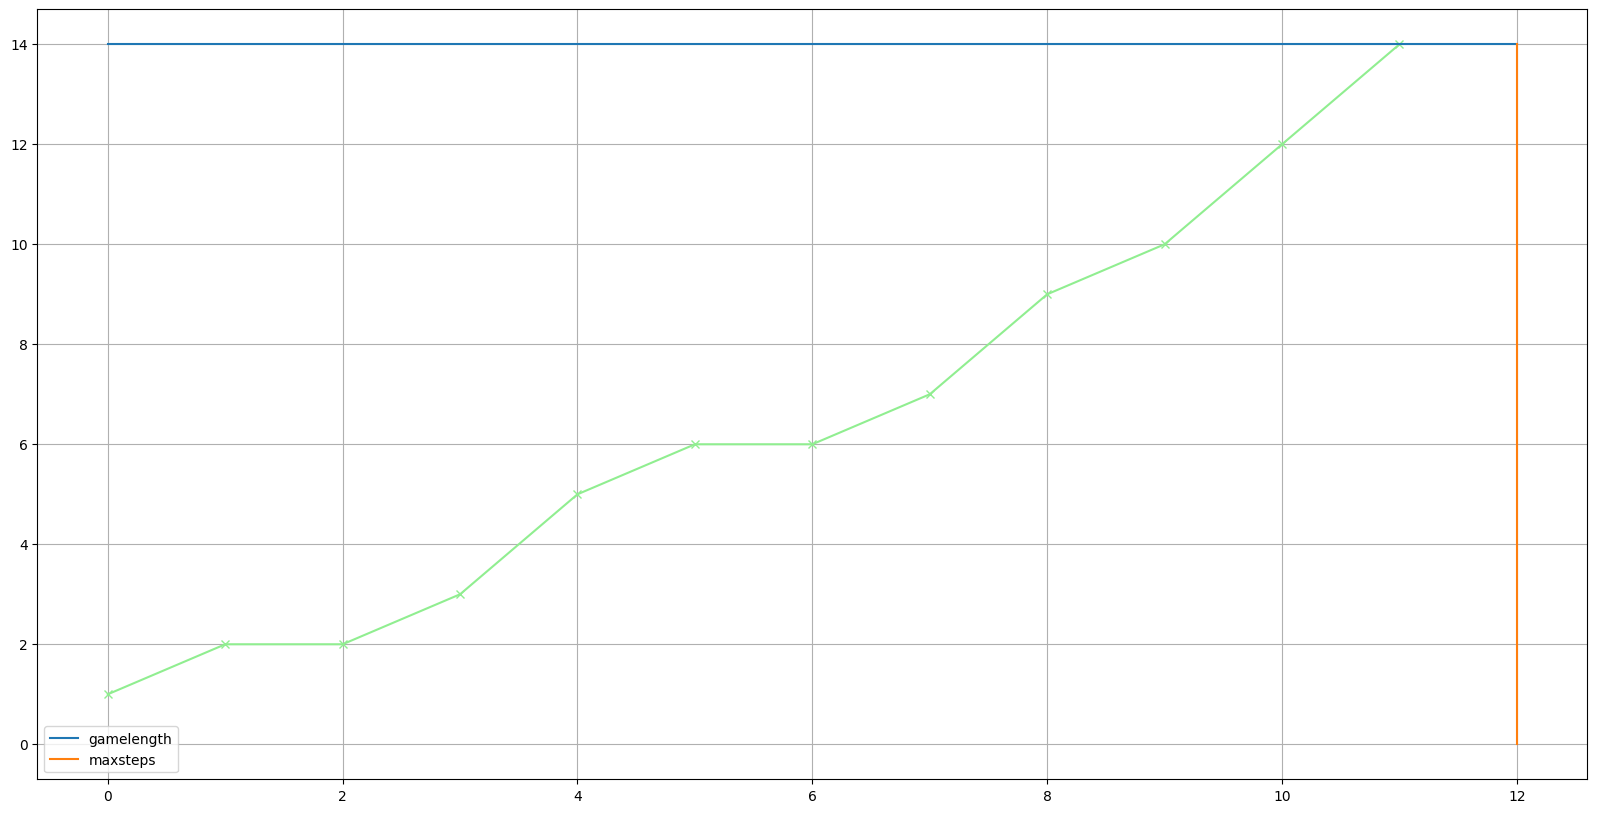

In [47]:
max_step_count = 0
min_step_count = -1

runs_steps=[]

for i in range(runs):
        current_pos_1 = -1

        step_count = 0
        steps = []
        while current_pos_1 < game_length:
                step_count += 1
                move_dist = random.choice([0,0,1,1])+random.choice([0,0,1,1])+random.choice([0,0,1,1])
                if ((current_pos_1 + move_dist)<=game_length):
                        current_pos_1+= move_dist
                steps.append(current_pos_1)
        
        if step_count > max_step_count:
                max_step_count = step_count
        if step_count < min_step_count or min_step_count == -1:
                min_step_count = step_count
        
        runs_steps.append((steps))

norm = mpl.colors.Normalize(vmin=min_step_count, vmax=max_step_count)
for steps in runs_steps:
        sc = cmap(norm(len(steps)))
        plt.plot(range(len(steps)),steps, marker='x', color=sc)

plt.plot((0,max_step_count),(game_length,game_length), label='gamelength')  # Plot some data on the (implicit) axes.
plt.plot((max_step_count,max_step_count),(0,game_length), label='maxsteps')  # Plot some data on the (implicit) axes.
plt.grid(True)
plt.legend()


1 Stone Exact End

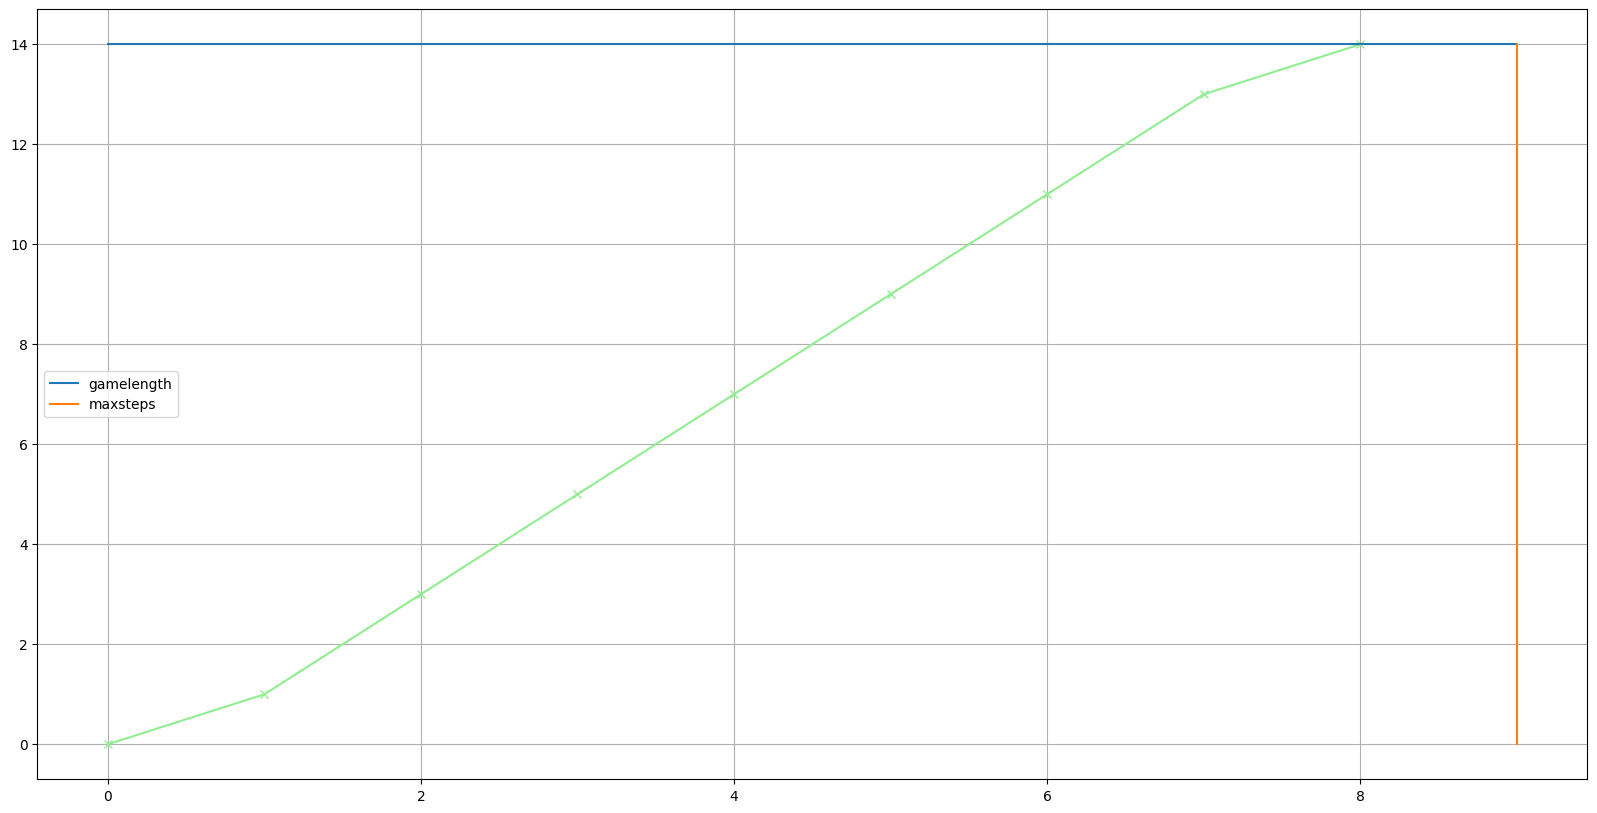

In [30]:
max_step_count = 0
min_step_count = -1

runs_steps=[]

for i in range(runs):
        current_pos_1 = -1

        step_count = 0
        steps = []
        while current_pos_1 < game_length:
                step_count += 1
                move_dist = random.choice([0,0,1,1])+random.choice([0,0,1,1])+random.choice([0,0,1,1])
                if ((current_pos_1 + move_dist)<=game_length):
                        current_pos_1+= move_dist
                steps.append(current_pos_1)
        
        if step_count > max_step_count:
                max_step_count = step_count
        if step_count < min_step_count or min_step_count == -1:
                min_step_count = step_count
        
        runs_steps.append((steps))

norm = mpl.colors.Normalize(vmin=min_step_count, vmax=max_step_count)
for steps in runs_steps:
        sc = cmap(norm(len(steps)))
        plt.plot(range(len(steps)),steps, marker='x', color=sc)

plt.plot((0,max_step_count),(game_length,game_length), label='gamelength')  # Plot some data on the (implicit) axes.
plt.plot((max_step_count,max_step_count),(0,game_length), label='maxsteps')  # Plot some data on the (implicit) axes.
plt.grid(True)
plt.legend()


# 2 Stones non blocking

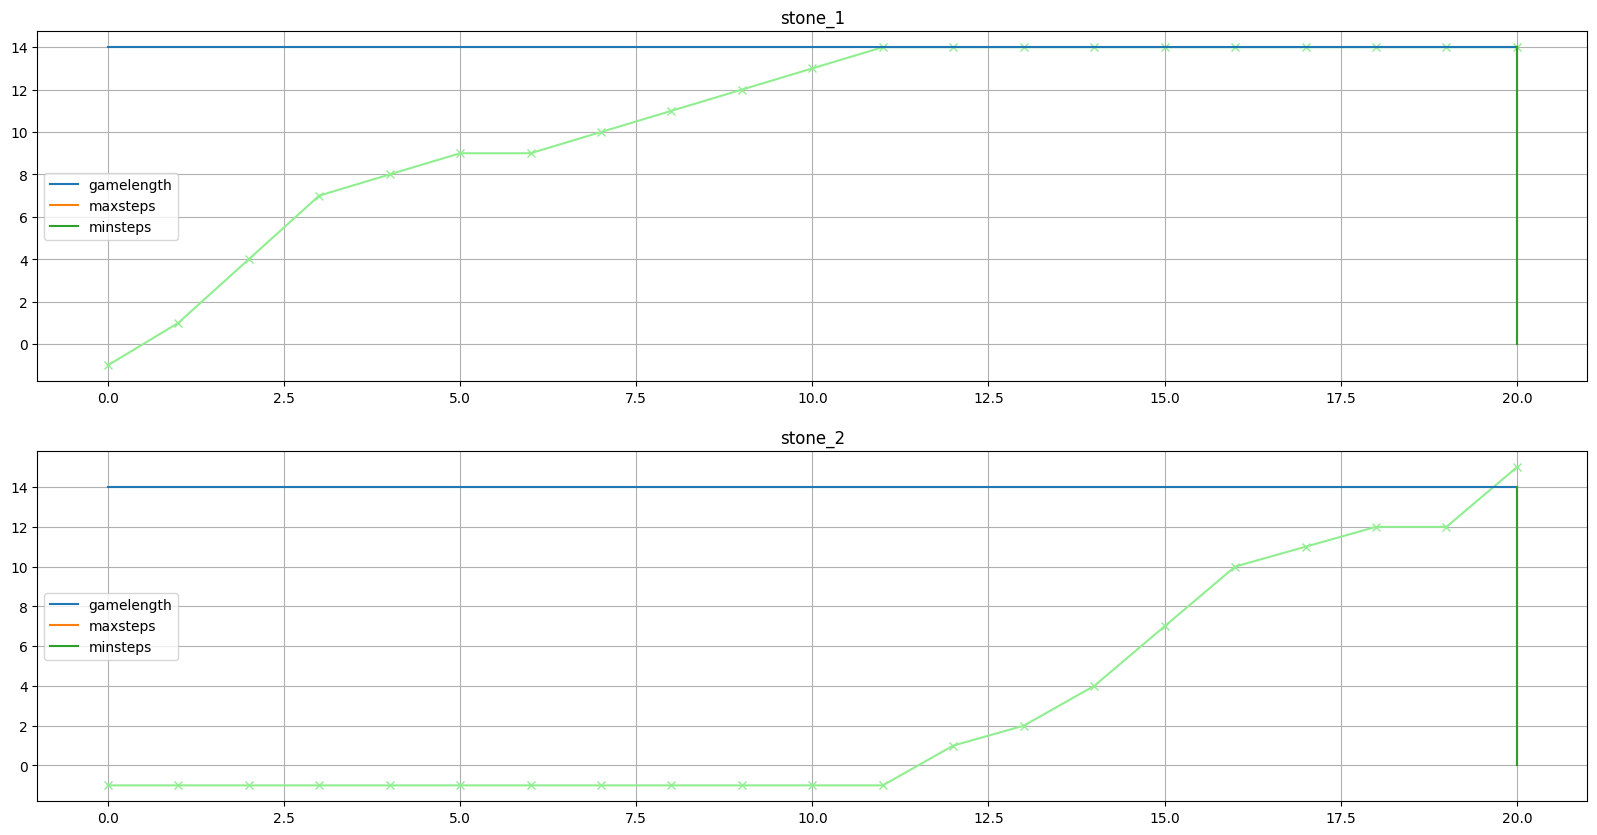

In [31]:
max_step_count = 0
min_step_count = -1

runs_steps=[]

plt.subplot(211)
plt.title("stone_1")
plt.subplot(212)
plt.title("stone_2")

def move_stone(pos_1,pos_2,move_dist):
        pos_1+= move_dist
        return pos_1, pos_2

for i in range(runs):
        current_pos_1 = -1
        current_pos_2 = -1

        step_count = 0
        steps_1 = []
        steps_2 = []
        steps_1.append(current_pos_1)
        steps_2.append(current_pos_2)
        while current_pos_1 < game_length or current_pos_2 < game_length:
                move_dist = random.choice([0,0,1,1])+random.choice([0,0,1,1])+random.choice([0,0,1,1])
                if current_pos_1 >= current_pos_2 and current_pos_1 < game_length:
                       current_pos_1,current_pos_2 = move_stone(current_pos_1,current_pos_2,move_dist)
                else: 
                       current_pos_2,current_pos_1 = move_stone(current_pos_2,current_pos_1,move_dist)
                
                step_count += 1
                steps_1.append(current_pos_1)
                steps_2.append(current_pos_2)


        if step_count > max_step_count:
                max_step_count = step_count
        if step_count < min_step_count or min_step_count == -1:
                min_step_count = step_count
        
        runs_steps.append((steps_1,steps_2))

norm = mpl.colors.Normalize(vmin=min_step_count, vmax=max_step_count)
for steps_1,steps_2 in runs_steps:
        sc = cmap(norm(len(steps_1)))
        plt.subplot(211)
        plt.plot(range(len(steps_1)),steps_1, marker='x', color=sc)
        plt.subplot(212)
        plt.plot(range(len(steps_2)),steps_2, marker='x', color=sc)

plt.subplot(211)
plt.title("stone_1")
plt.subplot(212)
plt.title("stone_2")

for subplotpos in [211,212]:
        plt.subplot(subplotpos)
        plt.plot((0,max_step_count),(game_length,game_length), label='gamelength')  # Plot some data on the (implicit) axes.
        plt.plot((max_step_count,max_step_count),(0,game_length), label='maxsteps')  # Plot some data on the (implicit) axes.
        plt.plot((min_step_count,min_step_count),(0,game_length), label='minsteps')  # Plot some data on the (implicit) axes.
        plt.grid(True)
        plt.legend()


# 2 Stones non blocking exact end

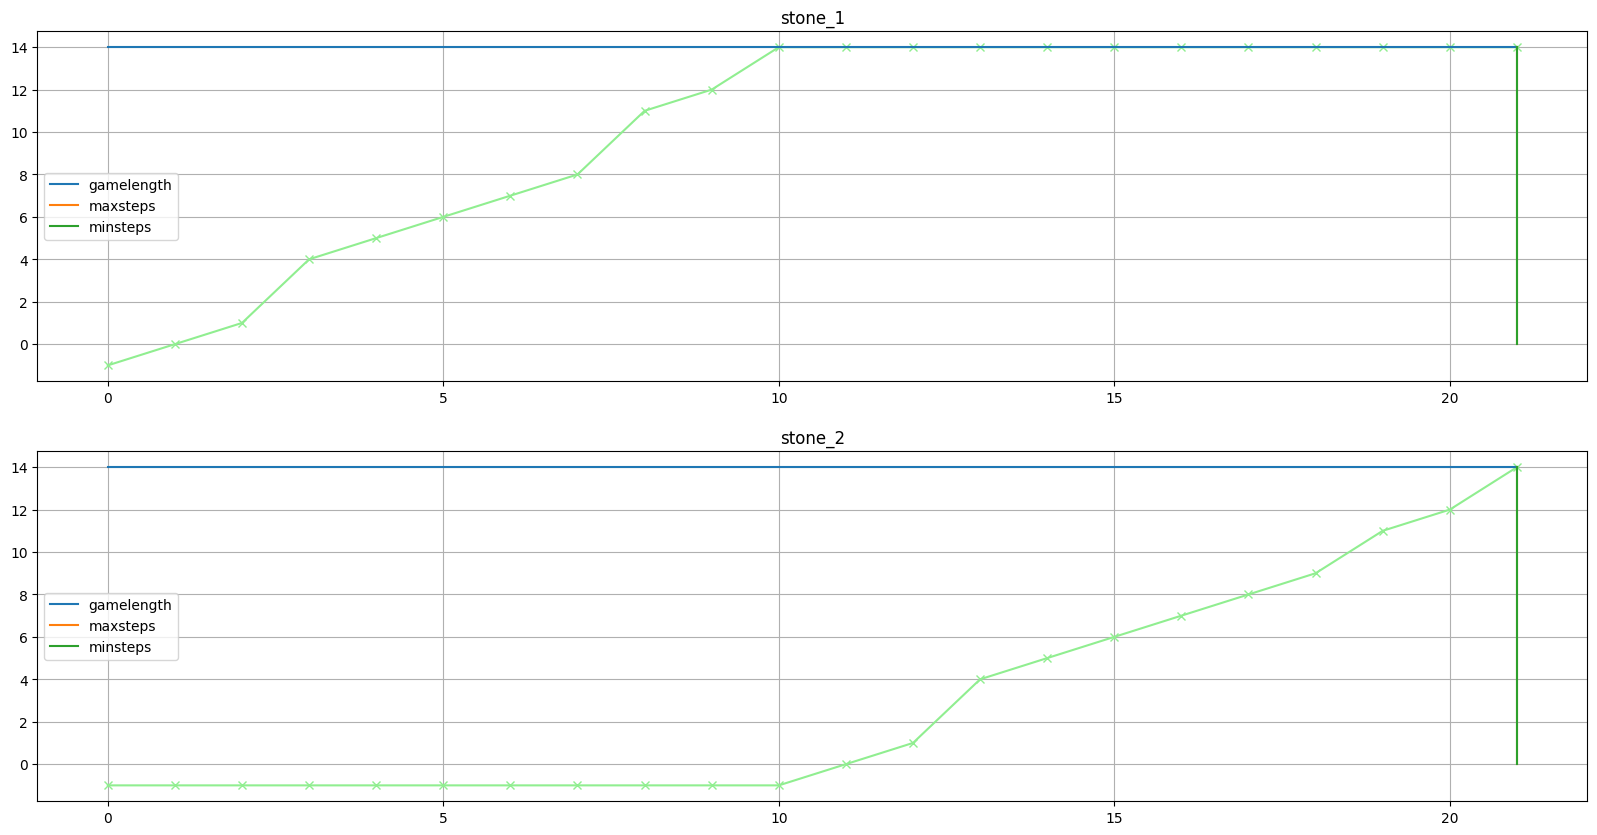

In [32]:
max_step_count = 0
min_step_count = -1

runs_steps=[]

plt.subplot(211)
plt.title("stone_1")
plt.subplot(212)
plt.title("stone_2")

def move_stone(pos_1,pos_2,move_dist):
        if ((pos_1 + move_dist)<=game_length):
                pos_1+= move_dist
        elif ((pos_2 + move_dist)<=game_length):
                pos_2+= move_dist
        return pos_1, pos_2

for i in range(runs):
        current_pos_1 = -1
        current_pos_2 = -1

        step_count = 0
        steps_1 = []
        steps_2 = []
        steps_1.append(current_pos_1)
        steps_2.append(current_pos_2)
        while current_pos_1 < game_length or current_pos_2 < game_length:
                move_dist = random.choice([0,0,1,1])+random.choice([0,0,1,1])+random.choice([0,0,1,1])
                if current_pos_1 >= current_pos_2 and current_pos_1 < game_length:
                       current_pos_1,current_pos_2 = move_stone(current_pos_1,current_pos_2,move_dist)
                else: 
                       current_pos_2,current_pos_1 = move_stone(current_pos_2,current_pos_1,move_dist)
                
                step_count += 1
                steps_1.append(current_pos_1)
                steps_2.append(current_pos_2)


        if step_count > max_step_count:
                max_step_count = step_count
        if step_count < min_step_count or min_step_count == -1:
                min_step_count = step_count
        
        runs_steps.append((steps_1,steps_2))

norm = mpl.colors.Normalize(vmin=min_step_count, vmax=max_step_count)
for steps_1,steps_2 in runs_steps:
        sc = cmap(norm(len(steps_1)))
        plt.subplot(211)
        plt.plot(range(len(steps_1)),steps_1, marker='x', color=sc)
        plt.subplot(212)
        plt.plot(range(len(steps_2)),steps_2, marker='x', color=sc)

plt.subplot(211)
plt.title("stone_1")
plt.subplot(212)
plt.title("stone_2")

for subplotpos in [211,212]:
        plt.subplot(subplotpos)
        plt.plot((0,max_step_count),(game_length,game_length), label='gamelength')  # Plot some data on the (implicit) axes.
        plt.plot((max_step_count,max_step_count),(0,game_length), label='maxsteps')  # Plot some data on the (implicit) axes.
        plt.plot((min_step_count,min_step_count),(0,game_length), label='minsteps')  # Plot some data on the (implicit) axes.
        plt.grid(True)
        plt.legend()


# 2 Stones blocking exact end

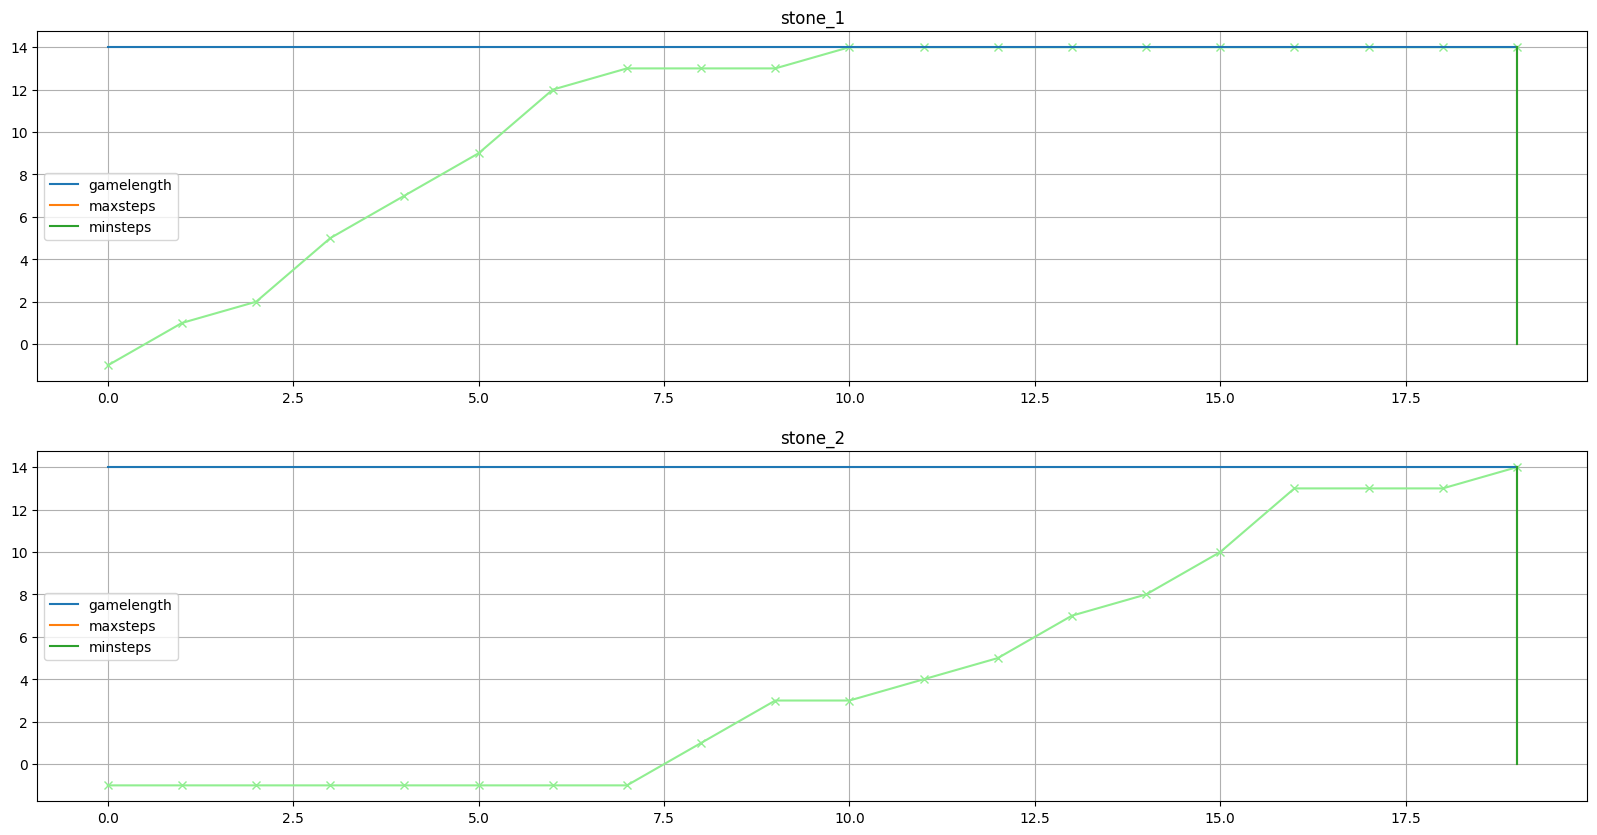

In [33]:
max_step_count = 0
min_step_count = -1

runs_steps=[]

plt.subplot(211)
plt.title("stone_1")
plt.subplot(212)
plt.title("stone_2")

def move_stone(pos_1,pos_2,move_dist):
        if ((pos_1 + move_dist)<=game_length and (pos_1+move_dist != pos_2 or (pos_1+move_dist == pos_2 and pos_2 == game_length ))):
                pos_1+= move_dist
        elif ((pos_2 + move_dist)<=game_length and (pos_2+move_dist != pos_1 or (pos_2+move_dist == pos_1 and pos_1 == game_length ))):
                pos_2+= move_dist
        return pos_1, pos_2

for i in range(runs):
        current_pos_1 = -1
        current_pos_2 = -1

        step_count = 0
        steps_1 = []
        steps_2 = []
        steps_1.append(current_pos_1)
        steps_2.append(current_pos_2)
        while current_pos_1 < game_length or current_pos_2 < game_length:
                move_dist = random.choice([0,0,1,1])+random.choice([0,0,1,1])+random.choice([0,0,1,1])
                
                if current_pos_1 >= current_pos_2 and current_pos_1 < game_length:
                       current_pos_1,current_pos_2 = move_stone(current_pos_1,current_pos_2,move_dist)
                
                else: 
                       current_pos_2,current_pos_1 = move_stone(current_pos_2,current_pos_1,move_dist)
                
                step_count += 1
                steps_1.append(current_pos_1)
                steps_2.append(current_pos_2)


        if step_count > max_step_count:
                max_step_count = step_count
        if step_count < min_step_count or min_step_count == -1:
                min_step_count = step_count
        
        runs_steps.append((steps_1,steps_2))

norm = mpl.colors.Normalize(vmin=min_step_count, vmax=max_step_count)
for steps_1,steps_2 in runs_steps:
        sc = cmap(norm(len(steps_1)))
        plt.subplot(211)
        plt.plot(range(len(steps_1)),steps_1, marker='x', color=sc)
        plt.subplot(212)
        plt.plot(range(len(steps_2)),steps_2, marker='x', color=sc)

plt.subplot(211)
plt.title("stone_1")
plt.subplot(212)
plt.title("stone_2")

for subplotpos in [211,212]:
        plt.subplot(subplotpos)
        plt.plot((0,max_step_count),(game_length,game_length), label='gamelength')  # Plot some data on the (implicit) axes.
        plt.plot((max_step_count,max_step_count),(0,game_length), label='maxsteps')  # Plot some data on the (implicit) axes.
        plt.plot((min_step_count,min_step_count),(0,game_length), label='minsteps')  # Plot some data on the (implicit) axes.
        plt.grid(True)
        plt.legend()


# 2 Stones racing

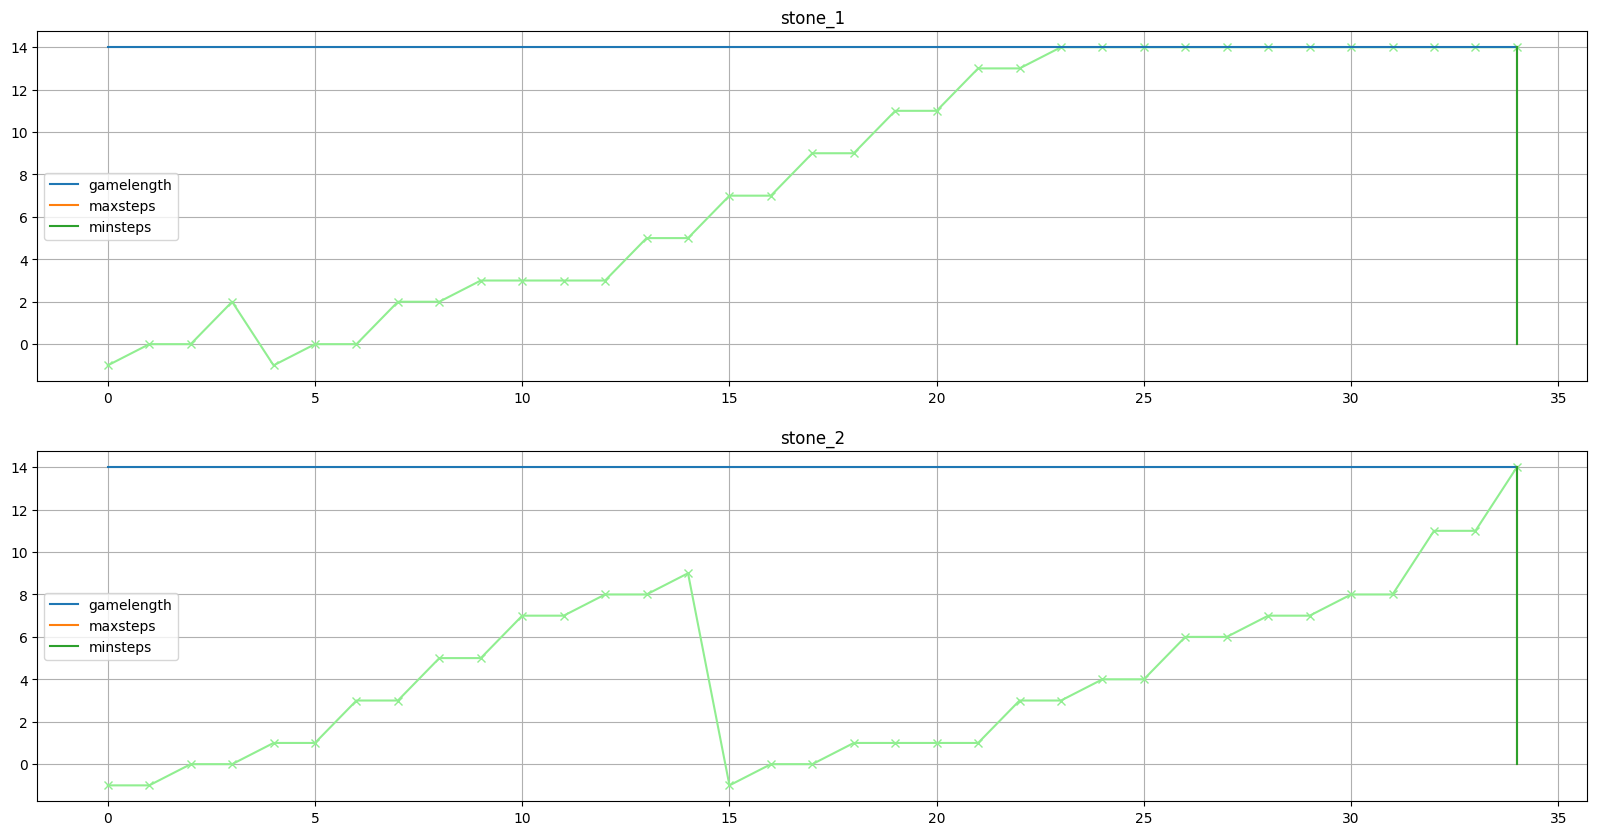

In [34]:
max_step_count = 0
min_step_count = -1
runs_steps=[]

plt.subplot(211)
plt.title("stone_1")
plt.subplot(212)
plt.title("stone_2")

def move_stone(pos_1,pos_2,move_dist):
        if (pos_1 + move_dist)<=game_length: 
                pos_1+= move_dist
                if (pos_1+move_dist == pos_2 and pos_2 != game_length and pos_2 > 1 and pos_2 < 10):
                        pos_2 = -1
        return pos_1, pos_2

for i in range(runs):
        current_pos_1 = -1
        current_pos_2 = -1

        step_count = 0
        steps_1 = []
        steps_2 = []
        steps_1.append(current_pos_1)
        steps_2.append(current_pos_2)
        while current_pos_1 < game_length or current_pos_2 < game_length:
                move_dist = random.choice([0,0,1,1])+random.choice([0,0,1,1])+random.choice([0,0,1,1])
                
                if step_count%2 ==0:
                       current_pos_1,current_pos_2 = move_stone(current_pos_1,current_pos_2,move_dist)
                
                else: 
                       current_pos_2,current_pos_1 = move_stone(current_pos_2,current_pos_1,move_dist)
                
                step_count += 1
                steps_1.append(current_pos_1)
                steps_2.append(current_pos_2)


        if step_count > max_step_count:
                max_step_count = step_count
        if step_count < min_step_count or min_step_count == -1:
                min_step_count = step_count
        
        runs_steps.append((steps_1,steps_2))

norm = mpl.colors.Normalize(vmin=min_step_count, vmax=max_step_count)
for steps_1,steps_2 in runs_steps:
        sc = cmap(norm(len(steps_1)))
        plt.subplot(211)
        plt.plot(range(len(steps_1)),steps_1, marker='x', color=sc)
        plt.subplot(212)
        plt.plot(range(len(steps_2)),steps_2, marker='x', color=sc)

plt.subplot(211)
plt.title("stone_1")
plt.subplot(212)
plt.title("stone_2")

for subplotpos in [211,212]:
        plt.subplot(subplotpos)
        plt.plot((0,max_step_count),(game_length,game_length), label='gamelength')  # Plot some data on the (implicit) axes.
        plt.plot((max_step_count,max_step_count),(0,game_length), label='maxsteps')  # Plot some data on the (implicit) axes.
        plt.plot((min_step_count,min_step_count),(0,game_length), label='minsteps')  # Plot some data on the (implicit) axes.
        plt.grid(True)
        plt.legend()


# 4 stones blocking

IndexError: GridSpec slice would result in no space allocated for subplot

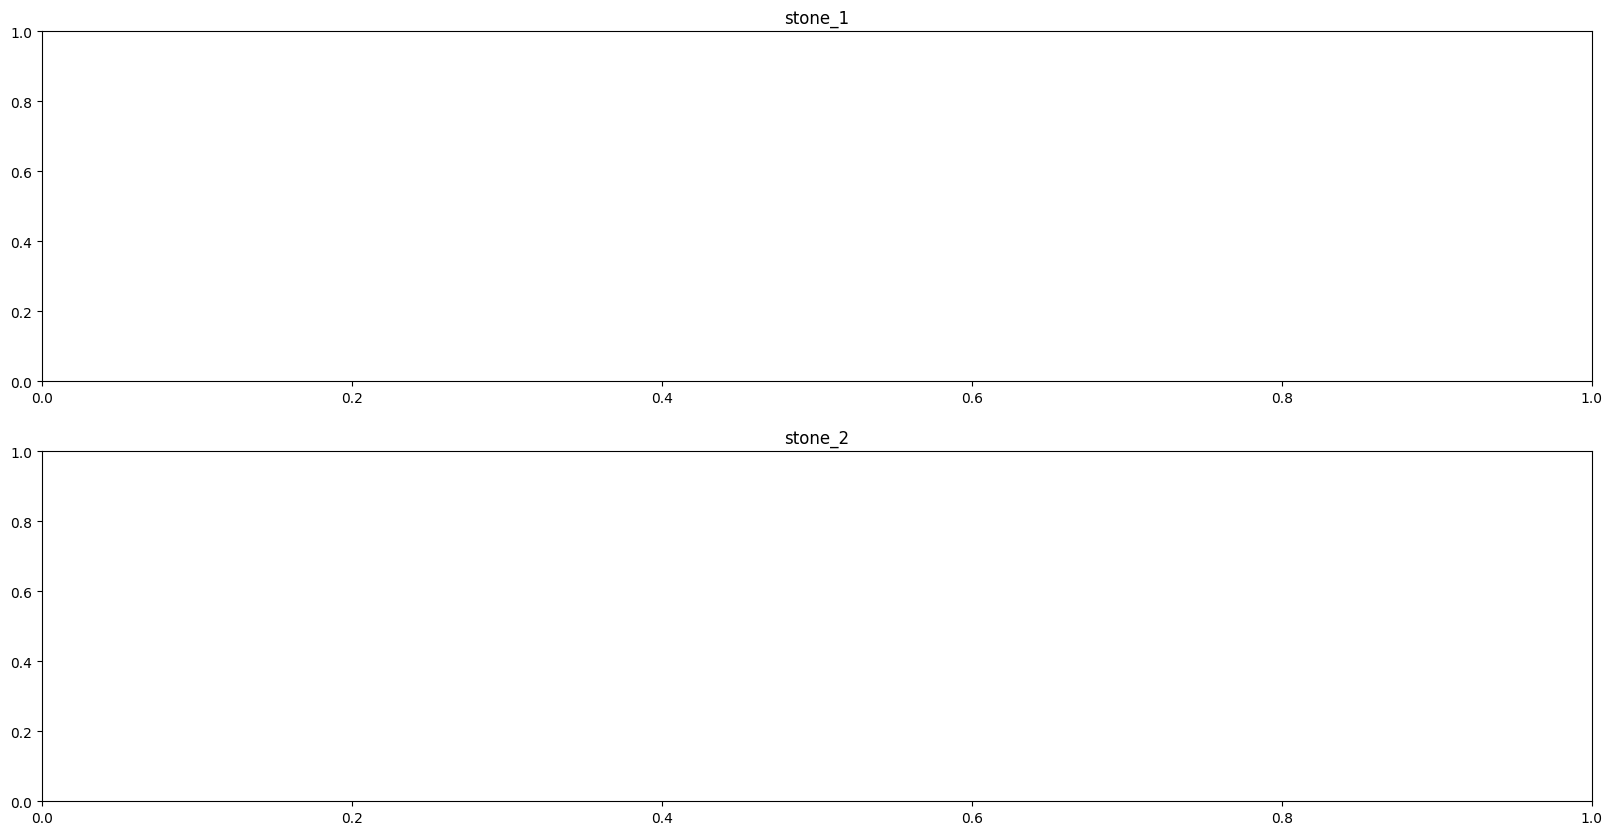

In [35]:
max_step_count = 0
min_step_count = -1

runs_steps=[]

plt.subplot(211)
plt.title("stone_1")
plt.subplot(212)
plt.title("stone_2")
plt.subplot(213)
plt.title("stone_3")
plt.subplot(214)
plt.title("stone_4")

def check_move(stone_1,other_stones,move_dist) -> bool:
        if (stone_1 + move_dist) <=game_length:
                return False
        for stone in other_stones:
                if not (stone_1+move_dist != stone or (stone_1+move_dist == stone and stone == game_length )):
                        return False
        return True



def move_stone(stones,move_dist):
        print(stones)
        print(move_dist)
        # for stone in stones:
        #         print("block: p1: "+str(pos_1)+" | pos_2: "+str(pos_2)+" | move_dist: "+str(move_dist))
        #         if check_move(stone, [s for s in stones if s != stone],move_dist):
        #                 return stones

        # return pos_1, pos_2

for i in range(runs):
        current_pos_1 = -1
        current_pos_2 = -1

        step_count = 0
        steps_1 = []
        steps_2 = []
        steps_1.append(current_pos_1)
        steps_2.append(current_pos_2)
        while current_pos_1 < game_length or current_pos_2 < game_length:
                move_dist = random.choice([0,0,1,1])+random.choice([0,0,1,1])+random.choice([0,0,1,1])
                
                if current_pos_1 >= current_pos_2 and current_pos_1 < game_length:
                       current_pos_1,current_pos_2 = move_stone(current_pos_1,current_pos_2,move_dist)
                
                else: 
                       current_pos_2,current_pos_1 = move_stone(current_pos_2,current_pos_1,move_dist)
                
                step_count += 1
                steps_1.append(current_pos_1)
                steps_2.append(current_pos_2)


        if step_count > max_step_count:
                max_step_count = step_count
        if step_count < min_step_count or min_step_count == -1:
                min_step_count = step_count
        
        runs_steps.append((steps_1,steps_2))

norm = mpl.colors.Normalize(vmin=min_step_count, vmax=max_step_count)
for steps_1,steps_2 in runs_steps:
        sc = cmap(norm(len(steps_1)))
        plt.subplot(211)
        plt.plot(range(len(steps_1)),steps_1, marker='x', color=sc)
        plt.subplot(212)
        plt.plot(range(len(steps_2)),steps_2, marker='x', color=sc)

plt.subplot(211)
plt.title("stone_1")
plt.subplot(212)
plt.title("stone_2")

for subplotpos in [211,212]:
        plt.subplot(subplotpos)
        plt.plot((0,max_step_count),(game_length,game_length), label='gamelength')  # Plot some data on the (implicit) axes.
        plt.plot((max_step_count,max_step_count),(0,game_length), label='maxsteps')  # Plot some data on the (implicit) axes.
        plt.plot((min_step_count,min_step_count),(0,game_length), label='minsteps')  # Plot some data on the (implicit) axes.
        plt.grid(True)
        plt.legend()
